# Post-fmriprep 

# Index

| Stage |
| --- |
| [INSPECT_OUTPUTS](#inspect) | 
| [REGISTRATION](#registration) | 
| [SMOOTHING](#smoothing) | 
| [NUISANCE_REGRESSION](#nuisance) | 
| [TSNR](#tsnr)|
| [PERCENT_SIGNAL_CHANGE](#psc)|
| [AVERAGING_ACROSS_RUNS](#merge)|
| --- |

# Goals

1. Inspect the outputs of fmriprep
2. Perform some pre-processing to prepare the data for model-fitting.

Note that I ran the following command to run frmiprep

```console
 fmriprep-docker /media/nicholas/STORE/Tomasdat/ds002574-download /media/nicholas/STORE/Tomasdat/ds002574-download/derivatives participant --participant-label 02 --fs-license-file /media/nicholas/STORE/FREESURFERDAT/license.txt -w /media/nicholas/STORE/temp --ignore slicetiming --nthreads 3 --fs-no-reconall
```

The important things to note are that:

1. I ran the command without the freesurfer options.
2. I skipped slice-timing. This is because an initial call led to an error.
3. I only ran the command on a very restricted subset of the data (subject 2, the first session). 

In [1]:
import os
from MRITOOLS import Utils

MRI tool version 1.0
loading nodes
loading workflows
loading utils


<a id='inspect'></a>

# INSPECT

Now define the directory where the outputs have been stored

In [2]:
OUTPUTDIR='/media/nicholas/STORE/Tomasdat/ds002574-download/derivatives/fmriprep/sub-02'

In [3]:
os.listdir(OUTPUTDIR)

['ses-01', 'anat', 'figures']

Anat contains the anatomical data

In [4]:
ANATDIR=os.path.join(OUTPUTDIR,'anat')

anatnifts=Utils.findniftis(ANATDIR,'.nii.gz')

Found 12 nifti files

In [5]:
Utils.getinfolist(anatnifts)

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()


VoxsizeX  VoxsizeY  VoxsizeZ  ShapeX  ShapeY  ShapeZ      TR  \
0  0.800008       0.8       0.8     312     320     320  1.0000   
0  0.800008       0.8       0.8     312     320     320  0.0099   
0  0.800008       0.8       0.8     312     320     320  1.0000   
0  0.800008       0.8       0.8     312     320     320  1.0000   
0  0.800008       0.8       0.8     312     320     320  1.0000   
0  0.800008       0.8       0.8     312     320     320  1.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   
0  1.000000       1.0       1.0     193     229     193  0.0000   

                                                FILE  
0                      sub-02_desc-brain_mask.nii.gz  
0                     sub-02_desc-preproc_T1w.nii.gz  
0                                 sub-02_dseg.nii.gz  
0                    sub-02_label-CSF_probseg.nii.gz  
0                     sub-02_label-GM_probseg.nii.gz  
0                     sub-02_label-WM_probseg.nii.gz  
0  sub-02_space-MNI152NLin2009cAsym_desc-brain_ma...  
0  sub-02_space-MNI152NLin2009cAsym_desc-preproc_...  
0       sub-02_space-MNI152NLin2009cAsym_dseg.nii.gz  
0  sub-02_space-MNI152NLin2009cAsym_label-CSF_pro...  
0  sub-02_space-MNI152NLin2009cAsym_label-GM_prob...  
0  sub-02_space-MNI152NLin2009cAsym_label-WM_prob...

A number of different anatomical volumes are returned in subject space and in MNI space

Here, for instance, we have the anatomy in MNI space

In [6]:
from nilearn import image
from nilearn import plotting
view = plotting.view_img(anatnifts[7])
view

There are also the grey and white matter segementations, which I plot below.

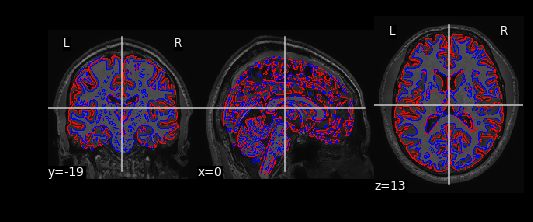

In [7]:
import matplotlib
display=plotting.plot_anat(anatnifts[7])    
display.add_edges(anatnifts[10])
display.add_edges(anatnifts[11],'b')
matplotlib.pyplot.show()

Now I want to look at the functional data

In [8]:
FUNCDIR=os.path.join(OUTPUTDIR,'ses-01','func')

In [9]:
funcnifts=Utils.findniftis(FUNCDIR,'.nii.gz')

Found 39 nifti files

In [10]:
Utils.getinfolist(funcnifts)

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/MRITOOLS/Utils/INSPECT.py:140: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  CFRAME=pd.concat(b)


FILE  ShapeX  ShapeY  ShapeZ  \
0  sub-02_ses-01_task-prf_run-01_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-01_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-01_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-02_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-02_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-02_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-03_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-03_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-03_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-04_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-04_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-04_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-05_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-05_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-05_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-06_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-06_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-06_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-07_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-07_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-07_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-08_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-08_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-08_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-09_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-09_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-09_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-10_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-10_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-10_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-11_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-11_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-11_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-12_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-12_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-12_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-13_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-13_space-MNI152NLin...      97     115      97   
0  sub-02_ses-01_task-prf_run-13_space-MNI152NLin...      97     115      97   

    TR  Volumes  VoxsizeX  VoxsizeY  VoxsizeZ  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0       2.0       2.0  
0  1.5    120.0       2.0       2.0       2.0  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0       2.0       2.0  
0  1.5    120.0       2.0       2.0       2.0  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0       2.0       2.0  
0  1.5    120.0       2.0       2.0       2.0  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0       2.0       2.0  
0  1.5    120.0       2.0       2.0       2.0  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0       2.0       2.0  
0  1.5    120.0       2.0       2.0       2.0  
0  1.0      NaN       2.0       2.0       2.0  
0  0.0      NaN       2.0      

For each of the 13 runs, there are 3 seperate files. All of them seem to be in MNI space.

1. The pre-processed functional volume
2. A 'reference volume'.
3. A brain mask

I want to seperate these out

In [11]:
funcrefs=[nift for nift in funcnifts if "boldref" in(nift)]
funcmasks=[nift for nift in funcnifts if "mask" in(nift)]
funcvols=[nift for nift in funcnifts if "preproc" in(nift)]

I want to see if the brain extraction has done something sensible. 

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


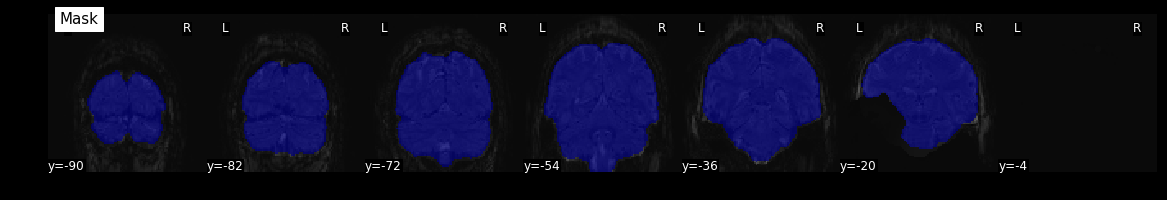

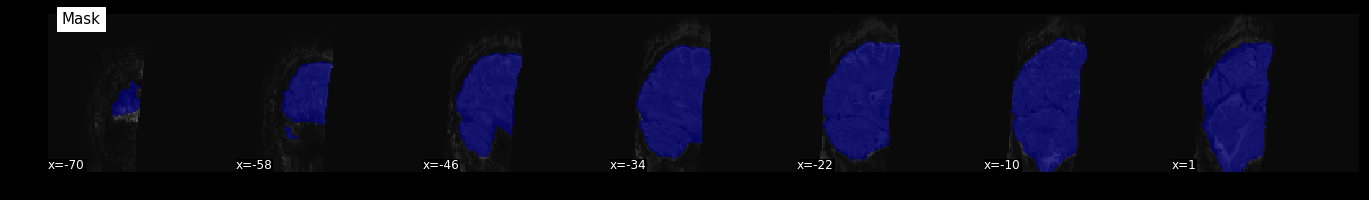

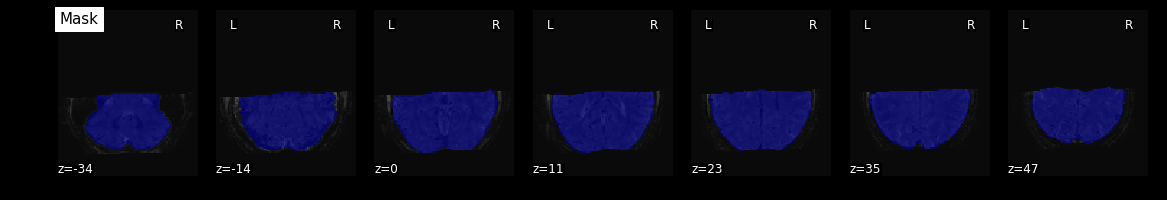

In [12]:
from nilearn.plotting import plot_roi
plot_roi(funcmasks[0],funcrefs[0],alpha=0.7, display_mode='y', cut_coords=7, title="Mask")
plot_roi(funcmasks[0],funcrefs[0],alpha=0.7, display_mode='x', cut_coords=7, title="Mask")
plot_roi(funcmasks[0],funcrefs[0],alpha=0.7, display_mode='z', cut_coords=7, title="Mask")

I also want to see if the ref volumes have been successfully registered to the MNI structural volume 

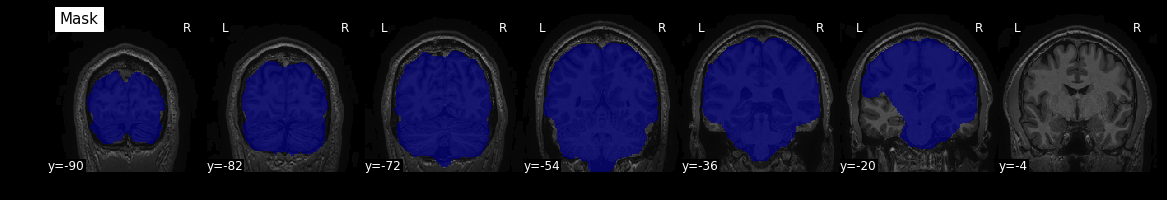

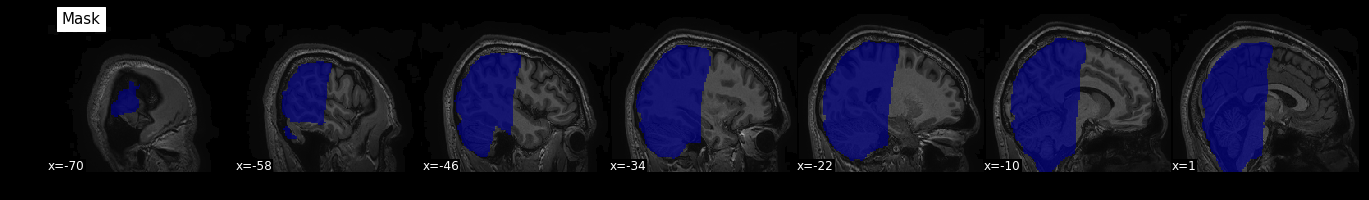

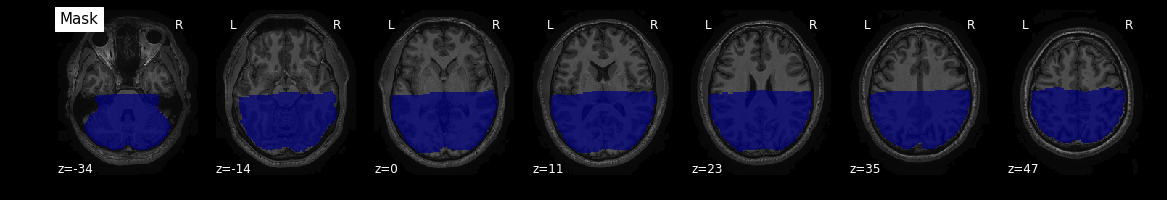

In [13]:
plot_roi(funcmasks[0],anatnifts[7],alpha=0.7, display_mode='y', cut_coords=7, title="Mask")
plot_roi(funcmasks[0],anatnifts[7],alpha=0.7, display_mode='x', cut_coords=7, title="Mask")
plot_roi(funcmasks[0],anatnifts[7],alpha=0.7, display_mode='z', cut_coords=7, title="Mask")

<a id='registration'></a>

# REGISTRATION

From the fmriprep documentation, it seems as though the functional volumes are aligned to MNI, but not to one another. Therefore, lets plot the anatomical data and overlay the functional brain masks to see if they align.

In [14]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
import numpy as np
import random as rd
names=list()
for name in mcd.CSS4_COLORS:
    names.append(name)
    
rd.choice(names)

u'firebrick'

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


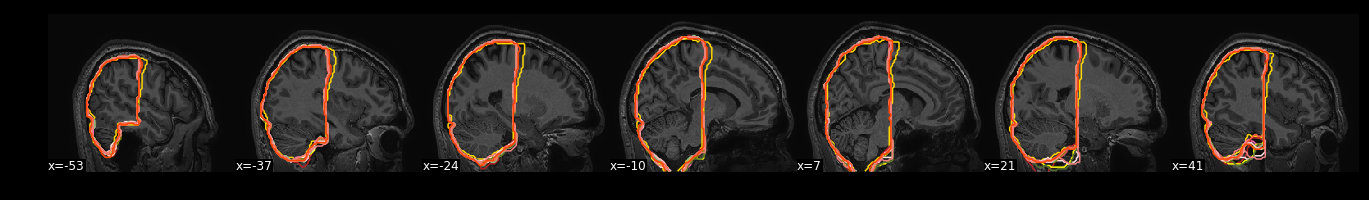

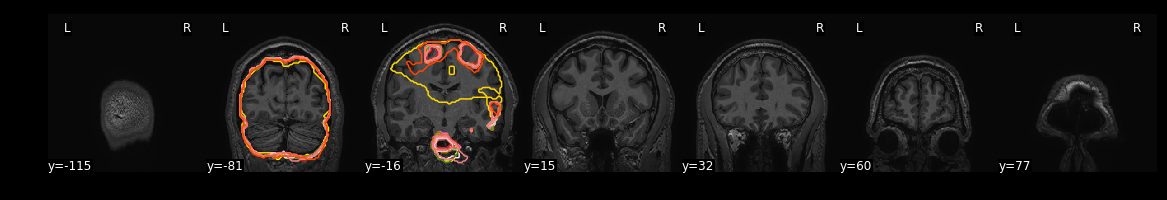

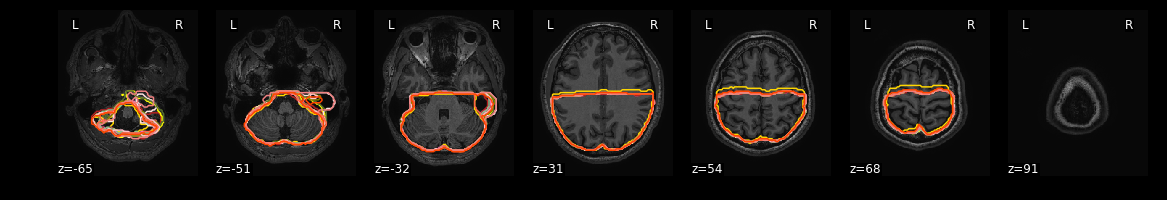

In [15]:
display1=plotting.plot_anat(anatnifts[7],display_mode='x', cut_coords=7)    
display2=plotting.plot_anat(anatnifts[7],display_mode='y', cut_coords=7)
display3=plotting.plot_anat(anatnifts[7],display_mode='z', cut_coords=7)

i=0
for func in funcmasks:
    i=i+1
    display1.add_contours(func, levels=[.5], colors=names[i])
    display2.add_contours(func, levels=[.5], colors=names[i])
    display3.add_contours(func, levels=[.5], colors=names[i])
        
matplotlib.pyplot.show()

These all seem to align with each other reasonably well, with the exeption of perhaps 1. I wonder if its worth trying to flirt all of these into alignment with one another. 

To my mind, after having had a brief look in freeview, the second run is very well aligned with the structural data. Therefore, I would like to define this as a reference image.

In [16]:
refim=funcrefs[1]
refim
regdir=os.path.join('/media/nicholas/STORE',"reg")

matfn='.mat'
niftfn='_reg.nii.gz'

I now register all reference images to the second run

In [17]:
i=0
regdims=list()
regdmats=list()
from nipype.interfaces import fsl

for ref in funcrefs:

    regdims.append(regdir + '/' + os.path.split(ref)[1] + niftfn)
    regdmats.append(regdir + '/' + os.path.split(ref)[1] + matfn)

    #flt = fsl.FLIRT()
    #flt.inputs.in_file = ref
    #flt.inputs.dof = int(6)
    #flt.inputs.reference = refim
    #flt.inputs.out_matrix_file = regdmats[i]
    #flt.inputs.out_file = regdims[i]
    #flt.run()
    i=i+1

200408-17:51:09,236 nipype.utils INFO:
	 Running nipype version 1.3.2 (latest: 1.4.2)


Now apply the same transform to the masks

In [18]:
i=0
regdmasks=list()
for mask in funcmasks:
    regdmasks.append(regdir + '/' + os.path.split(mask)[1] + niftfn)
    #applyxfm = fsl.ApplyXFM()
    #applyxfm.inputs.in_file = mask
    #applyxfm.inputs.in_matrix_file = regdmats[i]
    #applyxfm.inputs.out_file = regdmasks[i]
    #applyxfm.inputs.reference = refim
    #applyxfm.inputs.apply_xfm = True
    #applyxfm.run() 
    i=i+1

Now plot as before.

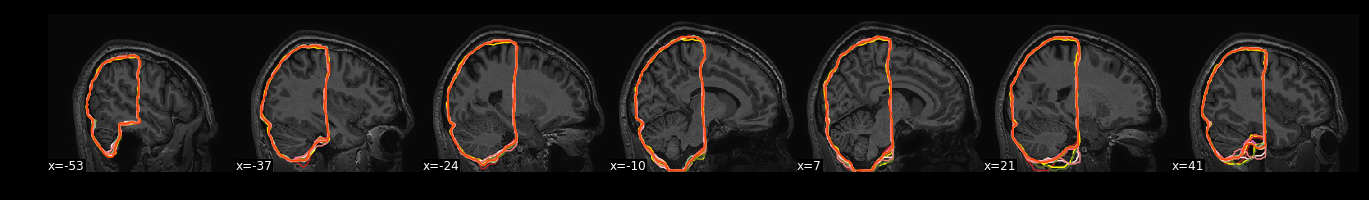

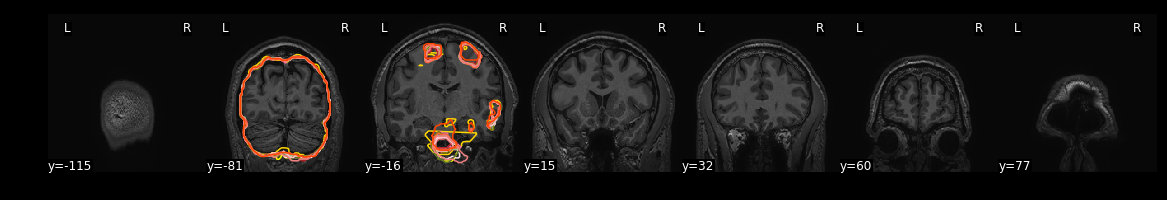

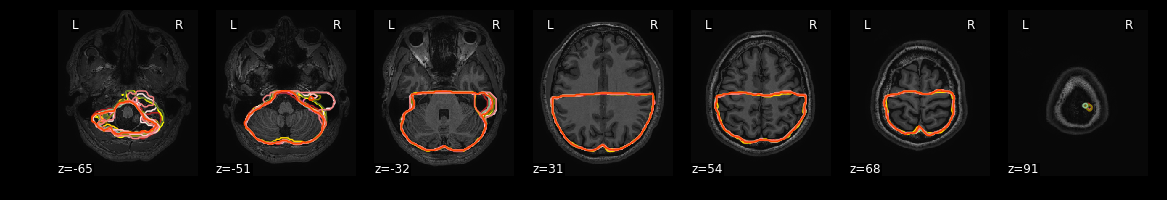

In [19]:
display1=plotting.plot_anat(anatnifts[7],display_mode='x', cut_coords=7)    
display2=plotting.plot_anat(anatnifts[7],display_mode='y', cut_coords=7)
display3=plotting.plot_anat(anatnifts[7],display_mode='z', cut_coords=7)

i=0
for mask in regdmasks:
    i=i+1
    display1.add_contours(mask, levels=[.5], colors=names[i])
    display2.add_contours(mask, levels=[.5], colors=names[i])
    display3.add_contours(mask, levels=[.5], colors=names[i])
        
matplotlib.pyplot.show()

This seems to have been somewhat successful. However, it still remains to apply the transformation to the entire set of functional volumes themselves (thus far we have only done the reference vols).

In [20]:
i=0
regdvols=list()
for vol in funcvols:
    regdvols.append(regdir + '/' + os.path.split(vol)[1] + niftfn)
    #applyxfm = fsl.ApplyXFM()
    #applyxfm.inputs.in_file = vol
    #applyxfm.inputs.in_matrix_file = regdmats[i]
    #applyxfm.inputs.out_file = regdvols[i]
    #applyxfm.inputs.reference = refim
    #applyxfm.inputs.apply_xfm = True
    #applyxfm.run() 
    i=i+1

<a id='smoothing'></a>

# SMOOTHING

Now I would like to smooth the volumes. I wasn't aware that this was a typical pre-processing stage for this type of data. I guess it is to help with when we eventually average across runs. To do this, I will use the afni command 3Dblurinmask. This returns the smoothed brains (extracting all non-brain regions).

In [21]:
from nipype.interfaces import afni as afni

smoothedvols=list()

i=0
for vol in regdvols:
    smoothedvols.append(regdir + '/' + os.path.split(vol)[1] + '_smooth3mm' + niftfn)
    #bim = afni.BlurInMask()
    #bim.inputs.in_file = regdvols[i]
    #bim.inputs.mask = regdmasks[i]
    #bim.inputs.fwhm = 3.0
    #bim.inputs.out_file=smoothedvols[i]
    #bim.run()
    i=i+1

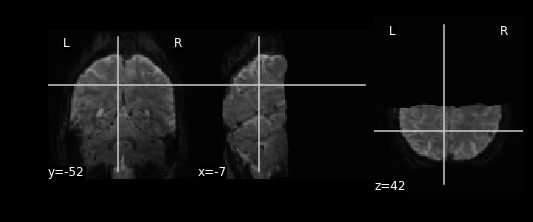

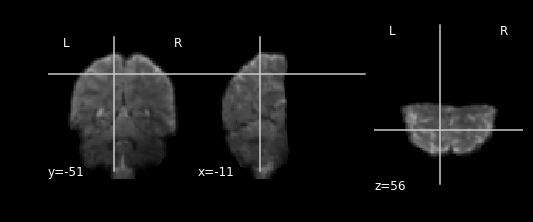

In [22]:
display1=Utils.bplot(regdvols[0])   
display2=Utils.bplot(smoothedvols[0])
matplotlib.pyplot.show()

<a id='detrending'></a>

# DETRENDING

Now, I would like to remove low-order drifts from the signal. Again, I use afni for this. This subtracts the mean from the signal, and so I would like to add this back in. This is a little more complicated, so I will define it as a small pipeline.  

In [38]:
from nipype.interfaces import afni as afni
from nipype.interfaces import fsl as fsl
import nipype.interfaces.utility as util 
import nipype.pipeline.engine as pe


inputnode = pe.Node(interface=util.IdentityInterface(fields=['files']),name='inputspec')
inputnode.iterables=([('files',smoothedvols)])


detrend = pe.Node(interface=afni.Detrend(),name='detrend',iterfield=['in_file'])
                     
detrend.inputs.args = '-polort 3'

meanfunc = pe.Node(interface=fsl.ImageMaths(op_string='-Tmean',suffix='_mean'),name='MEANVOL',iterfield=['in_file'])

addmean = pe.Node(interface=fsl.BinaryMaths(operation='add'),name='RE_ADD_MEAN',iterfield=['in_file','operand_file'])


outputnode = pe.Node(interface=util.IdentityInterface(fields=['detrended_files']),name='outputnode')

workflow = pe.Workflow(name='DETREND')
workflow.base_dir = regdir


workflow.connect(inputnode, 'files', meanfunc, 'in_file')
workflow.connect(inputnode, 'files', detrend, 'in_file')


workflow.connect(detrend, 'out_file', addmean, 'in_file')
workflow.connect(meanfunc, 'out_file', addmean, 'operand_file')


workflow.connect(addmean, 'out_file', outputnode, 'detrended_files')


workflow.write_graph(graph2use='exec')

result=workflow.run('MultiProc', plugin_args={'n_procs': 5})

200408-18:24:37,3 nipype.workflow INFO:
	 Generated workflow graph: /media/nicholas/STORE/reg/DETREND/graph.png (graph2use=exec, simple_form=True).
200408-18:24:37,10 nipype.workflow INFO:
	 Workflow DETREND settings: ['check', 'execution', 'logging', 'monitoring']
200408-18:24:37,62 nipype.workflow INFO:
	 Running in parallel.
200408-18:24:37,72 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 26 jobs ready. Free memory (GB): 10.36/10.36, Free processors: 5/5.
200408-18:24:37,245 nipype.workflow INFO:
	 [Node] Setting-up "DETREND.MEANVOL" in "/media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL".
200408-18:24:37,296 nipype.workflow INFO:
	 [Node] Running "MEANVOL" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-

200408-18:24:45,71 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 18 jobs ready. Free memory (GB): 9.36/10.36, Free processors: 0/5.                     
                     Currently running:
                       * DETREND.MEANVOL
                       * DETREND.detrend
                       * DETREND.detrend
                       * DETREND.detrend
                       * DETREND.detrend
200408-18:24:46,979 nipype.workflow INFO:
	 [Node] Finished "DETREND.MEANVOL".
200408-18:24:47,73 nipype.workflow INFO:
	 [Job 9] Completed (DETREND.MEANVOL).
200408-18:24:47,76 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 18 jobs ready. Free memory (GB): 9.56/10.36, Free processors: 1/5.                     
                     Currently running:
                       * DETREND.detrend
                       * DETREND.detrend
                       * DETREND.detrend
                       * DETREND.detrend
200408-18:24:47,188 nipype.workflow INFO:
	 [Node] Setting-up "D

200408-18:24:55,197 nipype.workflow INFO:
	 [Node] Setting-up "DETREND.MEANVOL" in "/media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL".
200408-18:24:55,206 nipype.workflow INFO:
	 [Node] Running "RE_ADD_MEAN" ("nipype.interfaces.fsl.maths.BinaryMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/detrend/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii -add /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.ni

200408-18:25:05,233 nipype.workflow INFO:
	 [Node] Finished "DETREND.detrend".
200408-18:25:05,488 nipype.workflow INFO:
	 [Node] Finished "DETREND.MEANVOL".
200408-18:25:05,704 nipype.workflow INFO:
	 [Node] Finished "DETREND.MEANVOL".
200408-18:25:07,90 nipype.workflow INFO:
	 [Job 13] Completed (DETREND.detrend).
200408-18:25:07,93 nipype.workflow INFO:
	 [Job 16] Completed (DETREND.MEANVOL).
200408-18:25:07,95 nipype.workflow INFO:
	 [Job 17] Completed (DETREND.MEANVOL).
200408-18:25:07,99 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 10 jobs ready. Free memory (GB): 9.96/10.36, Free processors: 3/5.                     
                     Currently running:
                       * DETREND.detrend
                       * DETREND.detrend
200408-18:25:07,243 nipype.workflow INFO:
	 [Node] Setting-up "DETREND.detrend" in "/media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.

200408-18:25:15,366 nipype.workflow INFO:
	 [Node] Running "RE_ADD_MEAN" ("nipype.interfaces.fsl.maths.BinaryMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/detrend/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii -add /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg_mean.nii.gz /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/RE_ADD_MEAN/sub-02_ses-01_task-prf_run-06_space-MNI1

200408-18:25:25,244 nipype.workflow INFO:
	 [Node] Setting-up "DETREND.detrend" in "/media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/detrend".
200408-18:25:25,249 nipype.workflow INFO:
	 [Node] Running "MEANVOL" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz -Tmean /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg_mean.nii.gz
200408-18:25:25,258 nipype.workflow INFO:
	 [Node] Running "detrend" ("nipype.interfaces.afni.preprocess

200408-18:25:37,253 nipype.workflow INFO:
	 [Node] Running "RE_ADD_MEAN" ("nipype.interfaces.fsl.maths.BinaryMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/detrend/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii -add /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg_mean.nii.gz /media/nicholas/STORE/reg/DETREND/_files_..media..nicholas..STORE..reg..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz_reg.nii.gz_smooth3mm_reg.nii.gz/RE_ADD_MEAN/sub-02_ses-01_task-prf_run-10_space-MNI1

I'm not 100% sure how to return the returned filenames in a list, so now I am going to find them manually.

In [39]:
import nipype.interfaces.io as nio
datasource1 = nio.DataGrabber()
datasource1.inputs.base_directory = regdir
datasource1.inputs.template = 'DETREND/*/*/*_maths.nii.gz'
datasource1.inputs.sort_filelist = True

results = datasource1.run()
b=results.outputs.outfiles


import shutil, os
files = b
for f in files:
    shutil.move(f,regdir+'/DETREND/OUTPUTS')
    
detrendvols=Utils.findniftis(regdir+'/DETREND/OUTPUTS/','.nii.gz')


Found 13 nifti files

<a id='nuisance'></a>

# NUISANCE REGRESSION

Now I define a set of nuisance variables. Note that I had to re-name some of these, since the ones in Dan's code dont match the output of the .tsv file that was produced by fmriprep. 

In [40]:
n_components=5
varr = ['std_dvars','dvars','framewise_displacement','a_comp_cor_00','a_comp_cor_01','a_comp_cor_02',
    'a_comp_cor_03',
    'a_comp_cor_04',
    'a_comp_cor_05',
    'trans_x',
    'trans_y',
    'trans_z',
    'rot_x',
    'rot_y',
    'rot_z']

Retrieve the nuisance files that were output by fmriprep

In [41]:
nuisances=list()
for file in os.listdir(FUNCDIR):
    if file.endswith('.tsv'):
        nuisances.append(FUNCDIR+"/"+file)
    nuisances=sorted(nuisances)

This next step is presumably to filter the nuisance variables in the same way as the functional data were detrended.

In [42]:
def savgol_filter(data, polyorder=3, deriv=0, window_length = 120,TR=1.5):
    """ Applies a savitsky-golay filter to a nifti-file.

    Fits a savitsky-golay filter to a 4D fMRI nifti-file and subtracts the
    fitted data from the original data to effectively remove low-frequency
    signals.

    """

    from scipy.signal import savgol_filter

    window = np.int(window_length / TR)

    # Window must be odd
    if window % 2 == 0:
        window += 1

    data_filt = savgol_filter(data, window_length=window, polyorder=polyorder,
                              deriv=deriv, mode='nearest')

    data_filtered = data - data_filt + data_filt.mean()

    return data_filtered

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from nistats.regression import OLSModel
import nibabel as nb
def perform_ng(volume,n_file):
        
        result = volume.split(".nii.gz")[0];
        
        out_fn= result + '_denoise' + '.nii.gz'
        
        df = pd.DataFrame.from_csv(n_file, sep='\t', header=0,index_col=None)

        # get the wanted variables and do stuff with it
        nuissances = []
        for var in varr:

            # get wanted nuissance variables
            data = np.array(df[var])
            # fill in nans
            data[data=='n/a'] = np.nan
            # cast to float
            data = data.astype('float32')
            # median fill nan values (i.e. first value )
            data[np.isnan(data)] = np.nanmedian(data)
            # temporally filter 
            filtered_data = savgol_filter(data)
            # z-score (so that explained variance ratios is interpretable)
            filtered_data_z = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)
            # and append
            nuissances.append(filtered_data_z)

        nuissances = np.array(nuissances)    

        # now do pca and grab first 5:
        pca = PCA(n_components=n_components)  
        pcas = pca.fit_transform(nuissances.T)

        # now load data
        img = nb.load(volume)
        data = np.nan_to_num(img.get_data())
        datashape = data.shape

        # do nuissance regression
        dm = np.hstack([np.ones((pcas.shape[0],1)),pcas]) # add intercept
        model = OLSModel(dm)
        fit = model.fit(data.reshape(-1,datashape[-1]).T)
        resid = fit.resid.T.reshape(datashape)
        resid += np.mean(data,axis=-1)[:,:,:,np.newaxis] # re-add the signal offset which was regressed out by the intercept
        
        # save
        new_img = nb.Nifti1Image(resid,affine=img.affine,header=img.header)
        nb.save(new_img,out_fn)

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
i=0
for vol in detrendvols:
    perform_ng(vol,nuisances[i])
    i=i+1

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # This is added back by InteractiveShellApp.init_path()
/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/nistats/regression.py:339: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,


<a id='tsnr'></a>

# TSNR

Function for computing temporal signal to noise ratio (just the mean divided by the SD). 

In [50]:
import numpy as np
def compute_tsnr(volume):
    result = volume.split(".nii.gz")[0];    
    out_fn= result + '_tsnr' + '.nii.gz'    
    img = nb.load(volume)
    data = img.get_data()
    tsnr = np.mean(data,axis=-1)/np.std(data,axis=-1)
    new_img = nb.Nifti1Image(tsnr,affine=img.affine,header=img.header)
    nb.save(new_img,out_fn)

Get the detrended data and calculate.

In [51]:
import nipype.interfaces.io as nio
datasource1 = nio.DataGrabber()
datasource1.inputs.base_directory = regdir
datasource1.inputs.template = 'DETREND/OUTPUTS/*_denoise.nii.gz'
datasource1.inputs.sort_filelist = True

results = datasource1.run()
denoised=results.outputs.outfiles

In [52]:
i=0
for vol in denoised:
    compute_tsnr(vol)
    i=i+1

/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


<a id='psc'></a>

# PERENT SIGNAL CHANGE

Here I compute a mean volume and feed this into afni calc to calculate PSC.

In [53]:
from nipype.interfaces import afni as afni
from nipype.interfaces import fsl as fsl
import nipype.interfaces.utility as util 
import nipype.pipeline.engine as pe


inputnode = pe.Node(interface=util.IdentityInterface(fields=['files']),name='inputspec')

inputnode.iterables=([('files',denoised)]) 


meanfunc = pe.Node(interface=fsl.ImageMaths(op_string='-Tmean',suffix='_mean'),name='MEANVOL')


psc = pe.Node(interface=afni.Calc(),name='psc')                     
psc.inputs.expr='100 * (a-b) /b'
psc.inputs.outputtype = "NIFTI"


workflow = pe.Workflow(name='PERCENT_SIGNAL_CHANGE')
workflow.base_dir = regdir


workflow.connect(inputnode, 'files', meanfunc, 'in_file')
workflow.connect(inputnode, 'files', psc, 'in_file_a')
workflow.connect(meanfunc, 'out_file', psc, 'in_file_b')


workflow.write_graph(graph2use='hierarchical')

result=workflow.run('MultiProc', plugin_args={'n_procs': 5})

200408-18:49:41,118 nipype.workflow INFO:
	 Generated workflow graph: /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/graph.png (graph2use=hierarchical, simple_form=True).
200408-18:49:41,124 nipype.workflow INFO:
	 Workflow PERCENT_SIGNAL_CHANGE settings: ['check', 'execution', 'logging', 'monitoring']
200408-18:49:41,161 nipype.workflow INFO:
	 Running in parallel.
200408-18:49:41,166 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 13 jobs ready. Free memory (GB): 10.36/10.36, Free processors: 5/5.
200408-18:49:41,289 nipype.workflow INFO:
	 [Node] Setting-up "PERCENT_SIGNAL_CHANGE.MEANVOL" in "/media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..OUTPUTS..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/MEANVOL".
200408-18:49:41,327 nipype.workflow INFO:
	 [Node] Running "MEANVOL" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/re

200408-18:49:47,343 nipype.workflow INFO:
	 [Node] Running "psc" ("nipype.interfaces.afni.utils.Calc"), a CommandLine Interface with command:
3dcalc -a /media/nicholas/STORE/reg/DETREND/OUTPUTS/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz -b /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..OUTPUTS..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_mean.nii.gz -expr "100 * (a-b) /b" -prefix sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii
200408-18:49:47,348 nipype.workflow INFO:
	 [Node] Running "psc" ("nipype.interfaces.afni.utils.Calc"), a CommandLine Interface with command:
3dcalc -a /media/nicholas/STORE/reg/DETREND/OUTPUTS/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz -b /media/nich

200408-18:49:57,180 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 3 jobs ready. Free memory (GB): 9.36/10.36, Free processors: 0/5.                     
                     Currently running:
                       * PERCENT_SIGNAL_CHANGE.MEANVOL
                       * PERCENT_SIGNAL_CHANGE.MEANVOL
                       * PERCENT_SIGNAL_CHANGE.MEANVOL
                       * PERCENT_SIGNAL_CHANGE.MEANVOL
                       * PERCENT_SIGNAL_CHANGE.MEANVOL
200408-18:49:59,317 nipype.workflow INFO:
	 [Node] Finished "PERCENT_SIGNAL_CHANGE.MEANVOL".
200408-18:49:59,318 nipype.workflow INFO:
	 [Node] Finished "PERCENT_SIGNAL_CHANGE.MEANVOL".
200408-18:49:59,336 nipype.workflow INFO:
	 [Node] Finished "PERCENT_SIGNAL_CHANGE.MEANVOL".
200408-18:49:59,354 nipype.workflow INFO:
	 [Node] Finished "PERCENT_SIGNAL_CHANGE.MEANVOL".
200408-18:49:59,370 nipype.workflow INFO:
	 [Node] Finished "PERCENT_SIGNAL_CHANGE.MEANVOL".
200408-18:50:01,193 nipype.workflow INFO:
	 [Job 10] Com

200408-18:50:07,340 nipype.workflow INFO:
	 [Node] Running "MEANVOL" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/DETREND/OUTPUTS/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz -Tmean /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..OUTPUTS..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/MEANVOL/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_mean.nii.gz
200408-18:50:07,348 nipype.workflow INFO:
	 [Node] Running "MEANVOL" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /media/nicholas/STORE/reg/DETREND/OUTPUTS/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz -Tmean /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..OUTPUTS..sub-0

200408-18:50:19,227 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 0 jobs ready. Free memory (GB): 10.36/10.36, Free processors: 5/5.


<a id='merge'></a>

# AVERAGING ACROSS RUNS

Now average across runs. Note that I haven't weighted according to tsnr. I also haven't computed different subsets of data for out-of-sample validation.


I just want an average volume to do some model fitting on.   

In [52]:
import nipype.interfaces.io as nio
datasource1 = nio.DataGrabber()
datasource1.inputs.base_directory = regdir
datasource1.inputs.template = 'PERCENT_SIGNAL_CHANGE/*/*/*_calc.nii'
datasource1.inputs.sort_filelist = True

results = datasource1.run()
psc=results.outputs.outfiles

from nipype.interfaces import afni as afni
merge = afni.Merge()
merge.inputs.in_files = psc
merge.inputs.doall = True
merge.inputs.out_file = '/media/nicholas/STORE/merge.nii.gz'
merge.inputs.args= '-gmean'

merge.run() 

200406-11:50:54,977 nipype.interface INFO:
	 stderr 2020-04-06T11:50:54.977035:++ 3dmerge: AFNI version=Debian-18.0.05+git24-gb25b21054~dfsg.1-1~nd17.10+1+nd18.04+1 (May 17 2018) [64-bit]
200406-11:50:54,994 nipype.interface INFO:
	 stderr 2020-04-06T11:50:54.994051:++ default -1dindex = 0
200406-11:50:55,0 nipype.interface INFO:
	 stderr 2020-04-06T11:50:54.994051:++ default -1tindex = 1
200406-11:50:55,1 nipype.interface INFO:
	 stdout 2020-04-06T11:50:55.001834:Program 3dmerge 
200406-11:50:55,3 nipype.interface INFO:
	 stdout 2020-04-06T11:50:55.001834:3dmerge: edit and combine 3D datasets, by RW Cox
200406-11:50:55,4 nipype.interface INFO:
	 stdout 2020-04-06T11:50:55.001834:-- Editing sub-brick 0 
200406-11:50:55,5 nipype.interface INFO:
	 stdout 2020-04-06T11:50:55.001834:-- allocated 10.3 MB scratch memory
200406-11:50:55,486 nipype.interface INFO:
	 stdout 2020-04-06T11:50:55.486074:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..ST

200406-11:51:04,10 nipype.interface INFO:
	 stdout 2020-04-06T11:51:04.010296:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:04,476 nipype.interface INFO:
	 stdout 2020-04-06T11:51:04.476658:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:04,912 nipype.interface INFO:
	 stdout 2020-04-06T11:51:04.912682:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009

200406-11:51:12,257 nipype.interface INFO:
	 stdout 2020-04-06T11:51:12.257738:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:12,680 nipype.interface INFO:
	 stdout 2020-04-06T11:51:12.680597:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:13,76 nipype.interface INFO:
	 stdout 2020-04-06T11:51:13.076572:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:51:20,786 nipype.interface INFO:
	 stdout 2020-04-06T11:51:20.786465:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:21,181 nipype.interface INFO:
	 stdout 2020-04-06T11:51:21.181593:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:21,591 nipype.interface INFO:
	 stdout 2020-04-06T11:51:21.591275:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:51:28,725 nipype.interface INFO:
	 stdout 2020-04-06T11:51:28.725809:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:29,123 nipype.interface INFO:
	 stdout 2020-04-06T11:51:29.123121:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:29,519 nipype.interface INFO:
	 stdout 2020-04-06T11:51:29.519120:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:51:37,132 nipype.interface INFO:
	 stdout 2020-04-06T11:51:37.132833:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:37,551 nipype.interface INFO:
	 stdout 2020-04-06T11:51:37.550997:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:37,943 nipype.interface INFO:
	 stdout 2020-04-06T11:51:37.943839:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-11:51:45,192 nipype.interface INFO:
	 stdout 2020-04-06T11:51:45.192493:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:45,643 nipype.interface INFO:
	 stdout 2020-04-06T11:51:45.643589:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:46,32 nipype.interface INFO:
	 stdout 2020-04-06T11:51:46.032339:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009

200406-11:51:53,604 nipype.interface INFO:
	 stdout 2020-04-06T11:51:53.604541:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:51:53,607 nipype.interface INFO:
	 stdout 2020-04-06T11:51:53.607602:-- merging results into sub-brick 10
200406-11:51:53,611 nipype.interface INFO:
	 stdout 2020-04-06T11:51:53.607602:-- Editing sub-brick 11 
200406-11:51:53,612 nipype.interface INFO:
	 stdout 2020-04-06T11:51:53.607602:-- allocated 10.3 MB scratch memory
200406-11:51:54,10 nipype.interface INFO:
	 stdout 2020-04-06T11:51:54.009970:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/s

200406-11:52:01,524 nipype.interface INFO:
	 stdout 2020-04-06T11:52:01.524088:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:01,919 nipype.interface INFO:
	 stdout 2020-04-06T11:52:01.919758:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:02,322 nipype.interface INFO:
	 stdout 2020-04-06T11:52:02.322564:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:52:09,541 nipype.interface INFO:
	 stdout 2020-04-06T11:52:09.541774:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:09,939 nipype.interface INFO:
	 stdout 2020-04-06T11:52:09.939289:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:10,336 nipype.interface INFO:
	 stdout 2020-04-06T11:52:10.336323:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin200

200406-11:52:17,824 nipype.interface INFO:
	 stdout 2020-04-06T11:52:17.824793:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:18,222 nipype.interface INFO:
	 stdout 2020-04-06T11:52:18.222366:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:18,628 nipype.interface INFO:
	 stdout 2020-04-06T11:52:18.628892:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:52:25,741 nipype.interface INFO:
	 stdout 2020-04-06T11:52:25.741540:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:26,131 nipype.interface INFO:
	 stdout 2020-04-06T11:52:26.131149:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:26,526 nipype.interface INFO:
	 stdout 2020-04-06T11:52:26.526037:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:52:34,201 nipype.interface INFO:
	 stdout 2020-04-06T11:52:34.201358:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:34,588 nipype.interface INFO:
	 stdout 2020-04-06T11:52:34.588567:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:35,22 nipype.interface INFO:
	 stdout 2020-04-06T11:52:35.022337:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009

200406-11:52:42,253 nipype.interface INFO:
	 stdout 2020-04-06T11:52:42.253065:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:42,698 nipype.interface INFO:
	 stdout 2020-04-06T11:52:42.698088:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:43,101 nipype.interface INFO:
	 stdout 2020-04-06T11:52:43.101211:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:52:50,617 nipype.interface INFO:
	 stdout 2020-04-06T11:52:50.617450:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:50,620 nipype.interface INFO:
	 stdout 2020-04-06T11:52:50.620568:-- merging results into sub-brick 21
200406-11:52:50,621 nipype.interface INFO:
	 stdout 2020-04-06T11:52:50.620568:-- Editing sub-brick 22 
200406-11:52:50,623 nipype.interface INFO:
	 stdout 2020-04-06T11:52:50.620568:-- allocated 10.3 MB scratch memory
200406-11:52:51,72 nipype.interface INFO:
	 stdout 2020-04-06T11:52:51.072219:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/s

200406-11:52:58,592 nipype.interface INFO:
	 stdout 2020-04-06T11:52:58.592413:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:58,987 nipype.interface INFO:
	 stdout 2020-04-06T11:52:58.987308:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:52:59,382 nipype.interface INFO:
	 stdout 2020-04-06T11:52:59.382068:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:53:06,577 nipype.interface INFO:
	 stdout 2020-04-06T11:53:06.577483:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:06,971 nipype.interface INFO:
	 stdout 2020-04-06T11:53:06.971564:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:07,362 nipype.interface INFO:
	 stdout 2020-04-06T11:53:07.362298:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin200

200406-11:53:14,904 nipype.interface INFO:
	 stdout 2020-04-06T11:53:14.904914:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:15,287 nipype.interface INFO:
	 stdout 2020-04-06T11:53:15.287075:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:15,693 nipype.interface INFO:
	 stdout 2020-04-06T11:53:15.693142:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:53:22,862 nipype.interface INFO:
	 stdout 2020-04-06T11:53:22.862128:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:23,260 nipype.interface INFO:
	 stdout 2020-04-06T11:53:23.260181:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:23,666 nipype.interface INFO:
	 stdout 2020-04-06T11:53:23.666258:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:53:31,225 nipype.interface INFO:
	 stdout 2020-04-06T11:53:31.225521:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:31,624 nipype.interface INFO:
	 stdout 2020-04-06T11:53:31.624190:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:32,23 nipype.interface INFO:
	 stdout 2020-04-06T11:53:32.023169:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009

200406-11:53:39,229 nipype.interface INFO:
	 stdout 2020-04-06T11:53:39.229436:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:39,625 nipype.interface INFO:
	 stdout 2020-04-06T11:53:39.625561:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:40,18 nipype.interface INFO:
	 stdout 2020-04-06T11:53:40.018459:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009

200406-11:53:47,605 nipype.interface INFO:
	 stdout 2020-04-06T11:53:47.605455:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:47,608 nipype.interface INFO:
	 stdout 2020-04-06T11:53:47.608739:-- merging results into sub-brick 32
200406-11:53:47,610 nipype.interface INFO:
	 stdout 2020-04-06T11:53:47.608739:-- Editing sub-brick 33 
200406-11:53:47,611 nipype.interface INFO:
	 stdout 2020-04-06T11:53:47.608739:-- allocated 10.3 MB scratch memory
200406-11:53:48,23 nipype.interface INFO:
	 stdout 2020-04-06T11:53:48.023075:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/s

200406-11:53:55,584 nipype.interface INFO:
	 stdout 2020-04-06T11:53:55.584688:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:55,978 nipype.interface INFO:
	 stdout 2020-04-06T11:53:55.977979:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:53:56,370 nipype.interface INFO:
	 stdout 2020-04-06T11:53:56.370148:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:54:03,648 nipype.interface INFO:
	 stdout 2020-04-06T11:54:03.648472:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:04,44 nipype.interface INFO:
	 stdout 2020-04-06T11:54:04.043943:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:04,490 nipype.interface INFO:
	 stdout 2020-04-06T11:54:04.490491:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:54:12,222 nipype.interface INFO:
	 stdout 2020-04-06T11:54:12.222508:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:12,613 nipype.interface INFO:
	 stdout 2020-04-06T11:54:12.613708:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:13,17 nipype.interface INFO:
	 stdout 2020-04-06T11:54:13.017365:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009

200406-11:54:20,256 nipype.interface INFO:
	 stdout 2020-04-06T11:54:20.256006:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:20,642 nipype.interface INFO:
	 stdout 2020-04-06T11:54:20.642578:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:21,44 nipype.interface INFO:
	 stdout 2020-04-06T11:54:21.044733:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009

200406-11:54:28,795 nipype.interface INFO:
	 stdout 2020-04-06T11:54:28.795860:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:29,187 nipype.interface INFO:
	 stdout 2020-04-06T11:54:29.187534:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:29,589 nipype.interface INFO:
	 stdout 2020-04-06T11:54:29.589483:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-11:54:36,879 nipype.interface INFO:
	 stdout 2020-04-06T11:54:36.879136:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:37,277 nipype.interface INFO:
	 stdout 2020-04-06T11:54:37.277419:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:37,667 nipype.interface INFO:
	 stdout 2020-04-06T11:54:37.667389:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:54:45,443 nipype.interface INFO:
	 stdout 2020-04-06T11:54:45.443333:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:45,446 nipype.interface INFO:
	 stdout 2020-04-06T11:54:45.445990:-- merging results into sub-brick 43
200406-11:54:45,448 nipype.interface INFO:
	 stdout 2020-04-06T11:54:45.445990:-- Editing sub-brick 44 
200406-11:54:45,450 nipype.interface INFO:
	 stdout 2020-04-06T11:54:45.445990:-- allocated 10.3 MB scratch memory
200406-11:54:45,857 nipype.interface INFO:
	 stdout 2020-04-06T11:54:45.857861:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:54:53,614 nipype.interface INFO:
	 stdout 2020-04-06T11:54:53.614006:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:54,14 nipype.interface INFO:
	 stdout 2020-04-06T11:54:54.014548:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:54:54,410 nipype.interface INFO:
	 stdout 2020-04-06T11:54:54.410761:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009

200406-11:55:01,645 nipype.interface INFO:
	 stdout 2020-04-06T11:55:01.645703:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:02,46 nipype.interface INFO:
	 stdout 2020-04-06T11:55:02.046296:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:02,449 nipype.interface INFO:
	 stdout 2020-04-06T11:55:02.449151:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:55:10,286 nipype.interface INFO:
	 stdout 2020-04-06T11:55:10.286156:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:10,682 nipype.interface INFO:
	 stdout 2020-04-06T11:55:10.681971:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:11,87 nipype.interface INFO:
	 stdout 2020-04-06T11:55:11.087403:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009

200406-11:55:18,329 nipype.interface INFO:
	 stdout 2020-04-06T11:55:18.329626:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:18,731 nipype.interface INFO:
	 stdout 2020-04-06T11:55:18.731541:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:19,131 nipype.interface INFO:
	 stdout 2020-04-06T11:55:19.131591:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:55:26,930 nipype.interface INFO:
	 stdout 2020-04-06T11:55:26.930870:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:27,365 nipype.interface INFO:
	 stdout 2020-04-06T11:55:27.365782:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:27,772 nipype.interface INFO:
	 stdout 2020-04-06T11:55:27.772726:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-11:55:35,865 nipype.interface INFO:
	 stdout 2020-04-06T11:55:35.865564:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:36,303 nipype.interface INFO:
	 stdout 2020-04-06T11:55:36.303719:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:36,736 nipype.interface INFO:
	 stdout 2020-04-06T11:55:36.736240:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:55:44,936 nipype.interface INFO:
	 stdout 2020-04-06T11:55:44.936206:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:44,939 nipype.interface INFO:
	 stdout 2020-04-06T11:55:44.939692:-- merging results into sub-brick 54
200406-11:55:44,942 nipype.interface INFO:
	 stdout 2020-04-06T11:55:44.939692:-- Editing sub-brick 55 
200406-11:55:44,946 nipype.interface INFO:
	 stdout 2020-04-06T11:55:44.939692:-- allocated 10.3 MB scratch memory
200406-11:55:45,378 nipype.interface INFO:
	 stdout 2020-04-06T11:55:45.378370:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:55:56,268 nipype.interface INFO:
	 stdout 2020-04-06T11:55:56.268254:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:56,707 nipype.interface INFO:
	 stdout 2020-04-06T11:55:56.707358:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:55:57,148 nipype.interface INFO:
	 stdout 2020-04-06T11:55:57.148717:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:56:05,88 nipype.interface INFO:
	 stdout 2020-04-06T11:56:05.088655:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:05,493 nipype.interface INFO:
	 stdout 2020-04-06T11:56:05.493925:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:05,901 nipype.interface INFO:
	 stdout 2020-04-06T11:56:05.901360:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:56:13,906 nipype.interface INFO:
	 stdout 2020-04-06T11:56:13.906833:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:14,311 nipype.interface INFO:
	 stdout 2020-04-06T11:56:14.311753:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:14,723 nipype.interface INFO:
	 stdout 2020-04-06T11:56:14.723230:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:56:22,558 nipype.interface INFO:
	 stdout 2020-04-06T11:56:22.558461:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:22,983 nipype.interface INFO:
	 stdout 2020-04-06T11:56:22.983481:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:23,424 nipype.interface INFO:
	 stdout 2020-04-06T11:56:23.424766:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:56:31,217 nipype.interface INFO:
	 stdout 2020-04-06T11:56:31.217125:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:31,611 nipype.interface INFO:
	 stdout 2020-04-06T11:56:31.611008:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:32,17 nipype.interface INFO:
	 stdout 2020-04-06T11:56:32.017590:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009

200406-11:56:39,401 nipype.interface INFO:
	 stdout 2020-04-06T11:56:39.401478:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:39,805 nipype.interface INFO:
	 stdout 2020-04-06T11:56:39.805644:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:40,196 nipype.interface INFO:
	 stdout 2020-04-06T11:56:40.196620:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:56:47,891 nipype.interface INFO:
	 stdout 2020-04-06T11:56:47.891075:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:47,894 nipype.interface INFO:
	 stdout 2020-04-06T11:56:47.894283:-- merging results into sub-brick 65
200406-11:56:47,895 nipype.interface INFO:
	 stdout 2020-04-06T11:56:47.894283:-- Editing sub-brick 66 
200406-11:56:47,897 nipype.interface INFO:
	 stdout 2020-04-06T11:56:47.894283:-- allocated 10.3 MB scratch memory
200406-11:56:48,302 nipype.interface INFO:
	 stdout 2020-04-06T11:56:48.302848:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:56:55,965 nipype.interface INFO:
	 stdout 2020-04-06T11:56:55.965346:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:56,363 nipype.interface INFO:
	 stdout 2020-04-06T11:56:56.363802:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:56:56,757 nipype.interface INFO:
	 stdout 2020-04-06T11:56:56.757385:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:57:04,235 nipype.interface INFO:
	 stdout 2020-04-06T11:57:04.235269:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:04,656 nipype.interface INFO:
	 stdout 2020-04-06T11:57:04.656263:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:05,88 nipype.interface INFO:
	 stdout 2020-04-06T11:57:05.087996:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:57:12,805 nipype.interface INFO:
	 stdout 2020-04-06T11:57:12.805769:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:13,204 nipype.interface INFO:
	 stdout 2020-04-06T11:57:13.204780:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:13,630 nipype.interface INFO:
	 stdout 2020-04-06T11:57:13.630171:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:57:20,981 nipype.interface INFO:
	 stdout 2020-04-06T11:57:20.981125:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:21,376 nipype.interface INFO:
	 stdout 2020-04-06T11:57:21.376024:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:21,775 nipype.interface INFO:
	 stdout 2020-04-06T11:57:21.775743:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:57:29,428 nipype.interface INFO:
	 stdout 2020-04-06T11:57:29.428832:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:29,818 nipype.interface INFO:
	 stdout 2020-04-06T11:57:29.817977:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:30,229 nipype.interface INFO:
	 stdout 2020-04-06T11:57:30.229257:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-11:57:37,521 nipype.interface INFO:
	 stdout 2020-04-06T11:57:37.521801:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:37,926 nipype.interface INFO:
	 stdout 2020-04-06T11:57:37.926396:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:38,391 nipype.interface INFO:
	 stdout 2020-04-06T11:57:38.390912:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:57:46,214 nipype.interface INFO:
	 stdout 2020-04-06T11:57:46.214131:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:46,217 nipype.interface INFO:
	 stdout 2020-04-06T11:57:46.217513:-- merging results into sub-brick 76
200406-11:57:46,219 nipype.interface INFO:
	 stdout 2020-04-06T11:57:46.217513:-- Editing sub-brick 77 
200406-11:57:46,220 nipype.interface INFO:
	 stdout 2020-04-06T11:57:46.217513:-- allocated 10.3 MB scratch memory
200406-11:57:46,641 nipype.interface INFO:
	 stdout 2020-04-06T11:57:46.641927:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:57:54,389 nipype.interface INFO:
	 stdout 2020-04-06T11:57:54.389816:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:54,856 nipype.interface INFO:
	 stdout 2020-04-06T11:57:54.856662:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:57:55,268 nipype.interface INFO:
	 stdout 2020-04-06T11:57:55.268727:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:58:02,593 nipype.interface INFO:
	 stdout 2020-04-06T11:58:02.593194:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:02,991 nipype.interface INFO:
	 stdout 2020-04-06T11:58:02.991706:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:03,398 nipype.interface INFO:
	 stdout 2020-04-06T11:58:03.398022:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin200

200406-11:58:11,69 nipype.interface INFO:
	 stdout 2020-04-06T11:58:11.069257:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:11,468 nipype.interface INFO:
	 stdout 2020-04-06T11:58:11.468811:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:11,876 nipype.interface INFO:
	 stdout 2020-04-06T11:58:11.876477:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009

200406-11:58:19,231 nipype.interface INFO:
	 stdout 2020-04-06T11:58:19.231779:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:19,636 nipype.interface INFO:
	 stdout 2020-04-06T11:58:19.636750:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:20,62 nipype.interface INFO:
	 stdout 2020-04-06T11:58:20.062312:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009

200406-11:58:28,56 nipype.interface INFO:
	 stdout 2020-04-06T11:58:28.056685:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:28,469 nipype.interface INFO:
	 stdout 2020-04-06T11:58:28.469154:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:28,913 nipype.interface INFO:
	 stdout 2020-04-06T11:58:28.913021:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009

200406-11:58:36,443 nipype.interface INFO:
	 stdout 2020-04-06T11:58:36.443507:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:36,853 nipype.interface INFO:
	 stdout 2020-04-06T11:58:36.853291:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:37,251 nipype.interface INFO:
	 stdout 2020-04-06T11:58:37.251330:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:58:45,147 nipype.interface INFO:
	 stdout 2020-04-06T11:58:45.147448:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:45,150 nipype.interface INFO:
	 stdout 2020-04-06T11:58:45.150511:-- merging results into sub-brick 87
200406-11:58:45,151 nipype.interface INFO:
	 stdout 2020-04-06T11:58:45.150511:-- Editing sub-brick 88 
200406-11:58:45,152 nipype.interface INFO:
	 stdout 2020-04-06T11:58:45.150511:-- allocated 10.3 MB scratch memory
200406-11:58:45,565 nipype.interface INFO:
	 stdout 2020-04-06T11:58:45.564975:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:58:53,460 nipype.interface INFO:
	 stdout 2020-04-06T11:58:53.460069:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:53,856 nipype.interface INFO:
	 stdout 2020-04-06T11:58:53.856315:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:58:54,244 nipype.interface INFO:
	 stdout 2020-04-06T11:58:54.244804:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-11:59:01,676 nipype.interface INFO:
	 stdout 2020-04-06T11:59:01.676906:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:02,78 nipype.interface INFO:
	 stdout 2020-04-06T11:59:02.078792:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:02,491 nipype.interface INFO:
	 stdout 2020-04-06T11:59:02.491893:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009

200406-11:59:10,402 nipype.interface INFO:
	 stdout 2020-04-06T11:59:10.402406:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:10,807 nipype.interface INFO:
	 stdout 2020-04-06T11:59:10.807382:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:11,229 nipype.interface INFO:
	 stdout 2020-04-06T11:59:11.229022:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-11:59:18,682 nipype.interface INFO:
	 stdout 2020-04-06T11:59:18.682839:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:19,133 nipype.interface INFO:
	 stdout 2020-04-06T11:59:19.133587:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:19,539 nipype.interface INFO:
	 stdout 2020-04-06T11:59:19.539519:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-11:59:27,160 nipype.interface INFO:
	 stdout 2020-04-06T11:59:27.160670:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:27,556 nipype.interface INFO:
	 stdout 2020-04-06T11:59:27.556544:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:27,954 nipype.interface INFO:
	 stdout 2020-04-06T11:59:27.954873:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-11:59:35,383 nipype.interface INFO:
	 stdout 2020-04-06T11:59:35.383068:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:35,789 nipype.interface INFO:
	 stdout 2020-04-06T11:59:35.789473:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:36,187 nipype.interface INFO:
	 stdout 2020-04-06T11:59:36.187263:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-11:59:43,866 nipype.interface INFO:
	 stdout 2020-04-06T11:59:43.866520:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:43,869 nipype.interface INFO:
	 stdout 2020-04-06T11:59:43.869289:-- merging results into sub-brick 98
200406-11:59:43,870 nipype.interface INFO:
	 stdout 2020-04-06T11:59:43.869289:-- Editing sub-brick 99 
200406-11:59:43,871 nipype.interface INFO:
	 stdout 2020-04-06T11:59:43.869289:-- allocated 10.3 MB scratch memory
200406-11:59:44,277 nipype.interface INFO:
	 stdout 2020-04-06T11:59:44.277523:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/

200406-11:59:52,198 nipype.interface INFO:
	 stdout 2020-04-06T11:59:52.198597:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:52,607 nipype.interface INFO:
	 stdout 2020-04-06T11:59:52.607596:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-11:59:53,44 nipype.interface INFO:
	 stdout 2020-04-06T11:59:53.043972:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009

200406-12:00:01,677 nipype.interface INFO:
	 stdout 2020-04-06T12:00:01.677156:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:02,100 nipype.interface INFO:
	 stdout 2020-04-06T12:00:02.100047:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:02,534 nipype.interface INFO:
	 stdout 2020-04-06T12:00:02.534726:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin200

200406-12:00:11,578 nipype.interface INFO:
	 stdout 2020-04-06T12:00:11.578473:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:12,8 nipype.interface INFO:
	 stdout 2020-04-06T12:00:12.008930:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:12,454 nipype.interface INFO:
	 stdout 2020-04-06T12:00:12.454048:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009c

200406-12:00:21,676 nipype.interface INFO:
	 stdout 2020-04-06T12:00:21.675940:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:22,82 nipype.interface INFO:
	 stdout 2020-04-06T12:00:22.082059:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:22,488 nipype.interface INFO:
	 stdout 2020-04-06T12:00:22.488689:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009

200406-12:00:30,434 nipype.interface INFO:
	 stdout 2020-04-06T12:00:30.434637:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:30,876 nipype.interface INFO:
	 stdout 2020-04-06T12:00:30.876456:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:31,289 nipype.interface INFO:
	 stdout 2020-04-06T12:00:31.289031:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin200

200406-12:00:39,362 nipype.interface INFO:
	 stdout 2020-04-06T12:00:39.362676:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:39,785 nipype.interface INFO:
	 stdout 2020-04-06T12:00:39.785433:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:40,280 nipype.interface INFO:
	 stdout 2020-04-06T12:00:40.280058:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200

200406-12:00:48,428 nipype.interface INFO:
	 stdout 2020-04-06T12:00:48.428392:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:48,431 nipype.interface INFO:
	 stdout 2020-04-06T12:00:48.431082:-- merging results into sub-brick 109
200406-12:00:48,435 nipype.interface INFO:
	 stdout 2020-04-06T12:00:48.431082:-- Editing sub-brick 110 
200406-12:00:48,438 nipype.interface INFO:
	 stdout 2020-04-06T12:00:48.431082:-- allocated 10.3 MB scratch memory
200406-12:00:48,846 nipype.interface INFO:
	 stdout 2020-04-06T12:00:48.846090:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/ps

200406-12:00:57,166 nipype.interface INFO:
	 stdout 2020-04-06T12:00:57.166295:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-07_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:57,582 nipype.interface INFO:
	 stdout 2020-04-06T12:00:57.582248:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-08_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:00:57,983 nipype.interface INFO:
	 stdout 2020-04-06T12:00:57.982958:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin200

200406-12:01:06,686 nipype.interface INFO:
	 stdout 2020-04-06T12:01:06.686425:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:07,104 nipype.interface INFO:
	 stdout 2020-04-06T12:01:07.104298:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:07,514 nipype.interface INFO:
	 stdout 2020-04-06T12:01:07.514387:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin200

200406-12:01:15,432 nipype.interface INFO:
	 stdout 2020-04-06T12:01:15.432606:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-09_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:15,832 nipype.interface INFO:
	 stdout 2020-04-06T12:01:15.832166:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-10_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:16,244 nipype.interface INFO:
	 stdout 2020-04-06T12:01:16.244650:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin200

200406-12:01:24,999 nipype.interface INFO:
	 stdout 2020-04-06T12:01:24.999102:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:25,459 nipype.interface INFO:
	 stdout 2020-04-06T12:01:25.459006:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-04_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:25,976 nipype.interface INFO:
	 stdout 2020-04-06T12:01:25.976061:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin200

200406-12:01:34,30 nipype.interface INFO:
	 stdout 2020-04-06T12:01:34.030307:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-11_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:34,425 nipype.interface INFO:
	 stdout 2020-04-06T12:01:34.425474:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-12_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:34,829 nipype.interface INFO:
	 stdout 2020-04-06T12:01:34.829156:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-13_space-MNI152NLin2009

200406-12:01:42,307 nipype.interface INFO:
	 stdout 2020-04-06T12:01:42.307705:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:42,766 nipype.interface INFO:
	 stdout 2020-04-06T12:01:42.766080:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise.nii.gz/psc/sub-02_ses-01_task-prf_run-06_space-MNI152NLin2009cAsym_desc-preproc_bold_denoise_calc.nii..
200406-12:01:43,226 nipype.interface INFO:
	 stdout 2020-04-06T12:01:43.226577:-- processing file /media/nicholas/STORE/reg/PERCENT_SIGNAL_CHANGE/_files_..media..nicholas..STORE..reg..DETREND..sub-02_ses-01_task-prf_run-07_space-MNI152NLin200